## INTRODUCTION

In this project I have worked with 'Housing' dataset. With the help of this data set I identified the essential features that will be helpful in identifying the house price . In this data set I came across serveral variables that are useful in deciding the house price like crime rate, proprotion of residential land , proportion of non- retail business area,Average no of rooms per building,weighted distances to five Boston employment centres , Index of accessibility to radial highways etc.. As the dependent variable is Numeric I followed regression approach to identify the important features that would be helpful in predicting the house price.

### VARIABLES IN THE DATASET:

|VARIABLES NAME|VARIABLES DETAILS|
|-------------|-----------------|
|CRIM         |per capita crime rate by town (continuous)|
|ZN           |proportion of residential land zoned for lots over 25,000 sq.ft.(continuous)|
|INDUS        |proportion of non-retail business acres per town (continuous)|
|CHAS         |Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) (categorical)|
|NOX          |nitric oxides concentration (parts per 10 million) (continuous)|
|RM           |average number of rooms per dwelling (continuous)|
|AGE          |proportion of owner-occupied units built prior to 1940 (continuous)|
|DIS          |weighted distances to five Boston employment centres (continuous)|
|RAD          |index of accessibility to radial highways (discrete)|
|TAX          |full value property-tax rate per \$10,000 (continuous)|
|PTRATIO      |pupil-teacher ratio by town  (continuous)|
|B            |% 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (continuous)|
|LSTAT        |lower status of the population(continuous)|
|MEDV         |Median value of owner-occupied homes in $1000's '(continuous)|

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os

In [487]:
housing=pd.read_csv(r"C:\Users\dsv24\Downloads\housing.csv",names=["CRIM","ZN","INDUS","CHAS","NOX","RM" ,"AGE" ,"DIS" ,"RAD","TAX","PTRATIO","B","LSTAT","MEDV"],delimiter="\s+")
housing    # Reading a csv file using pandas library.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### Basic Exploration of Data

In [105]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [75]:
housing.head() # head function is used to observe the top 5 rows.Generally we can see how the data is distributed.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [76]:
housing.tail() # with the help of tail function we can look at the last  few columns and verify the data distribution.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [124]:
housing.shape  # with the help of shape we can recheck the no of observations and variables.

(506, 14)

In [77]:
housing.nunique() # this nunique funcitons gives us the no of unique variables present inside all the variables.

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [106]:
housing.info() # info function gives us an overview of the data frame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [122]:
housing['CHAS']=housing['CHAS'].astype('category') # converting the data type of "CHAS" to category.

In [123]:
housing.info() # now we can see that CHAS is converted to category.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    int64   
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(1), float64(12), int64(1)
memory usage: 52.1 KB


In [126]:
housing.describe(include='all') # with the help of describe function we can see all the basic statistical measures.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.0,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
unique,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,471.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.613524,11.363636,11.136779,NaN,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,NaN,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,NaN,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,NaN,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,NaN,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,NaN,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000


**Conduct the following data pre-processing steps only as necessary along with the reason behind doing it with suitable steps;**

a.Missing values
b.Erroneous/wrong values
c.Skewed data
d.Outliers 

#### Missing Values

In [128]:
housing.isnull().sum() # used is null and sum function to identify the no of null values present in the data set.

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:>

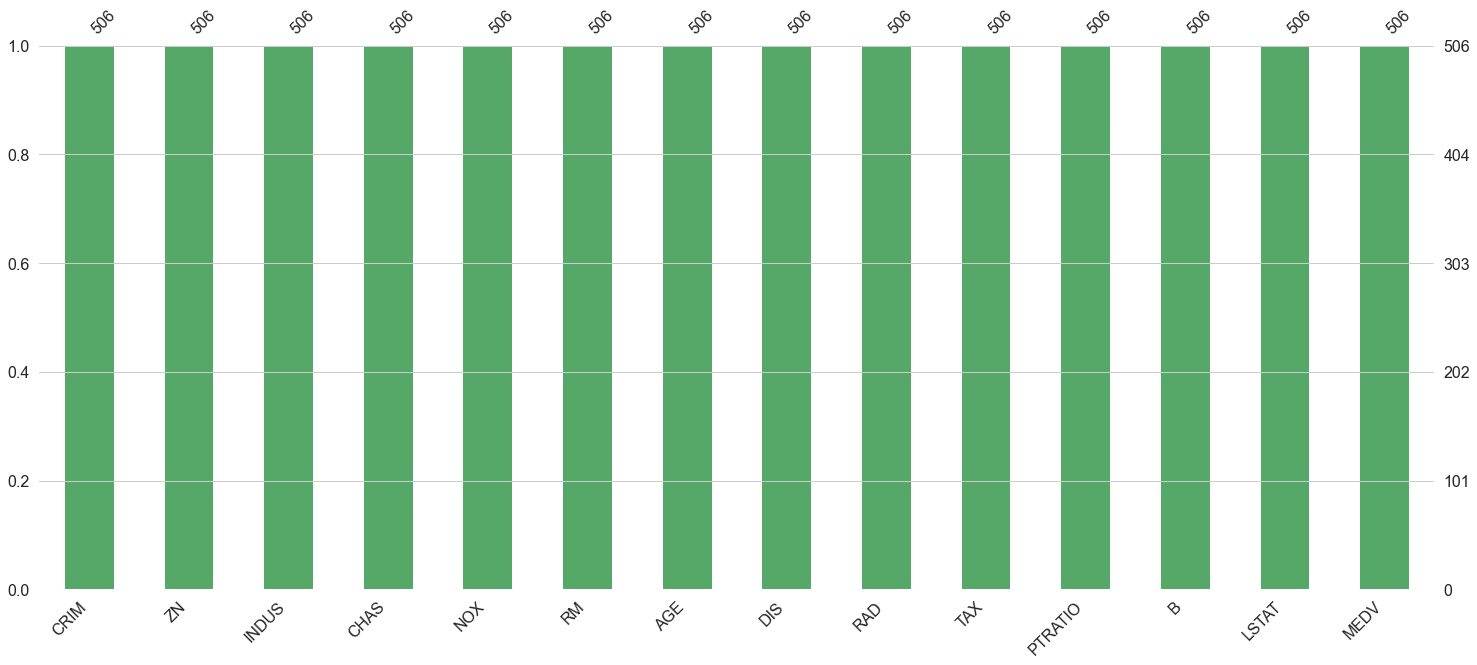

In [488]:
msno.bar(housing,color='g') # from the graph we can there are no missing values.

#### Inference:The null values in the above data set are ZERO

### Data Distribution of Numerical Variables

In [131]:
numericals=housing.select_dtypes(include='number').columns # created a variable numericals which contains numerical data types.
numericals

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

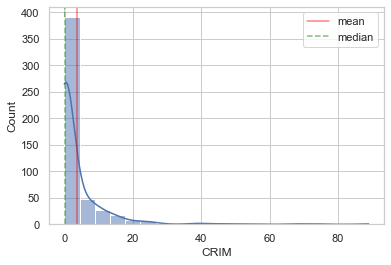

In [424]:
sns.histplot(data=housing['CRIM'],kde=True,bins=20) # I am using histplot to see data distribution and added bins as the data was not clearly visible before.
plt.axvline(x=housing.CRIM.mean(),color='red',alpha=0.5,label='mean')# created a vertical line to show  mean 
plt.axvline(x=housing.CRIM.median(),color='green',ls='--',alpha=0.5,label='median')# created a vertical line to show median
plt.legend() # legend function helps to show the categories that are present on the right side.

#### Inference : From the above plot it is clearly visible that data is Right skewed.Here mean is greater than median.

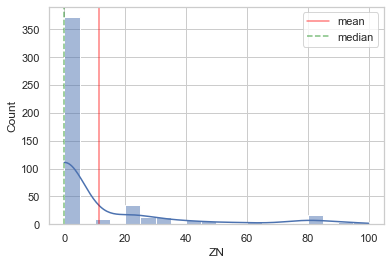

In [427]:
sns.histplot(data=housing['ZN'],kde=True,binwidth=5,color='b')# I am using histplot to see data distribution
plt.axvline(x=housing.ZN.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=housing.ZN.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : From the above plot it is clearly visible that data is Right skewed.Here mean is greater than median.

In [190]:
housing['ZN'].unique() # trying to see the unique variables present in the 'ZN'

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

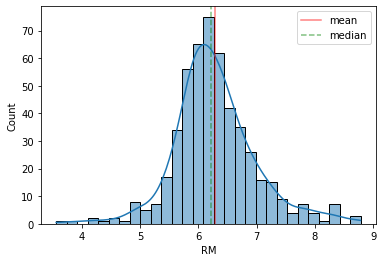

In [154]:
sns.histplot(data=housing['RM'],kde=True)# I am using histplot to see data distribution
plt.axvline(x=housing.RM.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=housing.RM.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : From the above plot it is clearly visible that data is Symmetric.Here mean is equal to median.

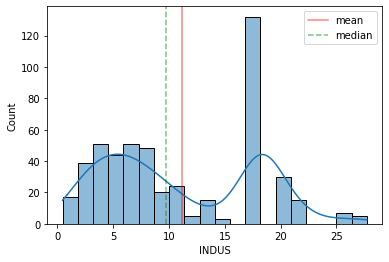

In [191]:
sns.histplot(data=housing['INDUS'],kde=True,bins=20)# I am using histplot to see data distribution
plt.axvline(x=housing.INDUS.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=housing.INDUS.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : From the above plot it is clearly visible that data is symmetric.Here mean is equal to median.

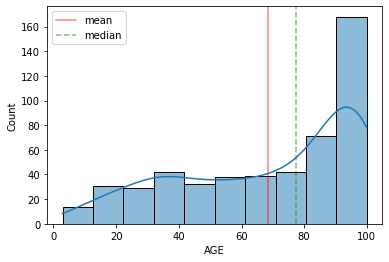

In [161]:
sns.histplot(data=housing['AGE'],kde=True)# I am using histplot to see data distribution
plt.axvline(x=housing.AGE.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=housing.AGE.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : From the above plot it is clearly visible that data is left skewed.Here mean is less than median.

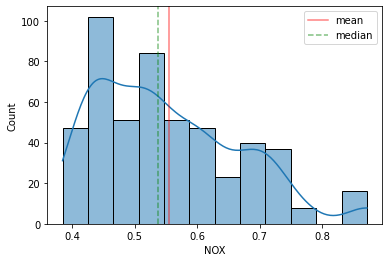

In [162]:
sns.histplot(data=housing['NOX'],kde=True)# I am using histplot to see data distribution
plt.axvline(x=housing.NOX.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=housing.NOX.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

In [ ]:
#### Inference : From the above plot it is clearly visible that data is Right skewed.Here mean is greater than median.

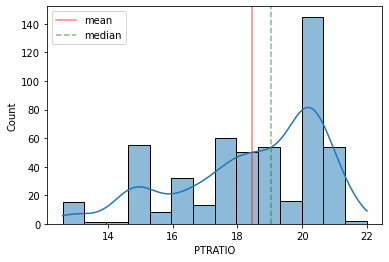

In [163]:
sns.histplot(data=housing['PTRATIO'],kde=True)# I am using histplot to see data distribution
plt.axvline(x=housing.PTRATIO.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=housing.PTRATIO.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : From the above plot it is clearly visible that data is left skewed.Here mean is less than median.

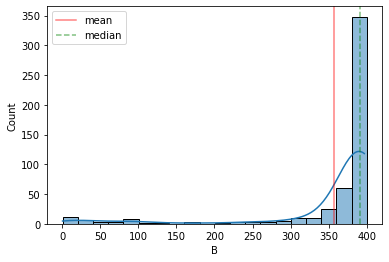

In [169]:
sns.histplot(data=housing['B'],kde=True,binwidth=20,bins=25)# I am using histplot to see data distribution
plt.axvline(x=housing.B.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=housing.B.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : From the above plot it is clearly visible that data is left skewed.Here mean is less than median.

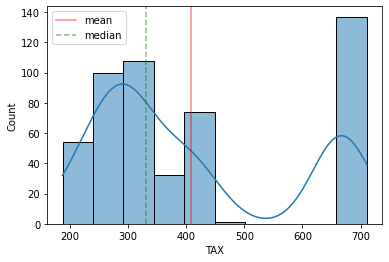

In [171]:
sns.histplot(data=housing['TAX'],kde=True)# I am using histplot to see data distribution
plt.axvline(x=housing.TAX.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=housing.TAX.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : From the above plot it is clearly visible that data is slightly Right skewed.Here mean is greater to median.

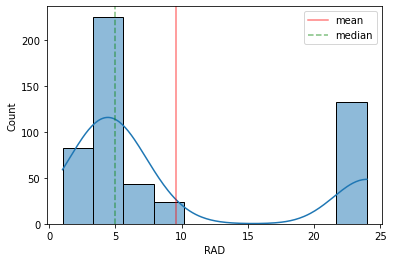

In [172]:
sns.histplot(data=housing['RAD'],kde=True)# I am using histplot to see data distribution
plt.axvline(x=housing.RAD.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=housing.RAD.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : From the above plot it is clearly visible that data is Right skewed.Here mean is greater than median.

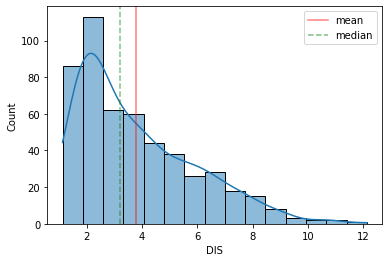

In [173]:
sns.histplot(data=housing['DIS'],kde=True)# I am using histplot to see data distribution
plt.axvline(x=housing.DIS.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=housing.DIS.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : From the above plot it is clearly visible that data is Right skewed.Here mean is greater than median.

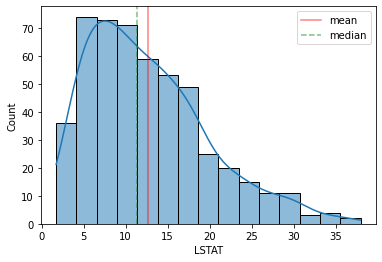

In [174]:
sns.histplot(data=housing['LSTAT'],kde=True)# I am using histplot to see data distribution
plt.axvline(x=housing.LSTAT.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=housing.LSTAT.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : From the above plot it is clearly visible that data is Right skewed.Here mean is greater than median.

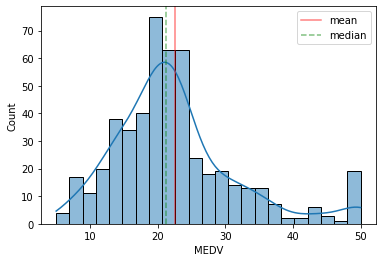

In [192]:
sns.histplot(data=housing['MEDV'],kde=True)# I am using histplot to see data distribution
plt.axvline(x=housing.MEDV.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=housing.MEDV.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : From the above plot it is clearly visible that data is Right skewed.Here mean is greater than median.

In [170]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [183]:
housing.skew() # skewness function shows the skewness values.

C:\Users\dsv24\AppData\Local\Temp/ipykernel_19472/2875596746.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing.skew()


CRIM       5.223149
ZN         2.225666
INDUS      0.295022
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

### OUTLIERS

In [ ]:
#UNIVARIATE ANALYSIS

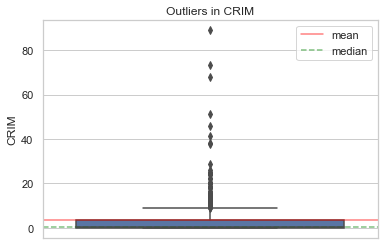

In [231]:
sns.set(style='whitegrid')# setting style to the background
sns.boxplot(y='CRIM', data=housing).set(title='Outliers in CRIM') # boxplot function
plt.axhline(y=housing.CRIM.mean(),color='red',alpha=0.5,label='mean') 
plt.axhline(y=housing.CRIM.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : The above graph clearly shows outliers in the box plot.

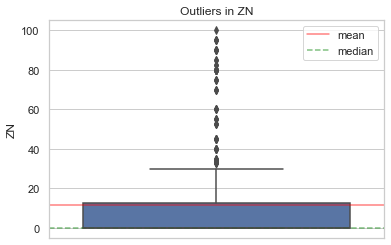

In [230]:
sns.set(style='whitegrid')
sns.boxplot(y='ZN', data=housing).set(title='Outliers in ZN')
plt.axhline(y=housing.ZN.mean(),color='red',alpha=0.5,label='mean')
plt.axhline(y=housing.ZN.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : The above graph clearly shows outliers in the box plot.

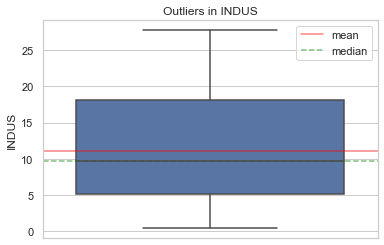

In [229]:
sns.set(style='whitegrid')
sns.boxplot(y='INDUS', data=housing).set(title='Outliers in INDUS')
plt.axhline(y=housing.INDUS.mean(),color='red',alpha=0.5,label='mean')
plt.axhline(y=housing.INDUS.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : No outliers are present in the above plot.

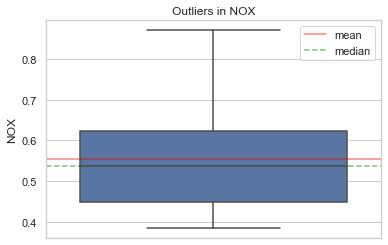

In [228]:
sns.set(style='whitegrid')
sns.boxplot(y='NOX', data=housing).set(title='Outliers in NOX')
plt.axhline(y=housing.NOX.mean(),color='red',alpha=0.5,label='mean')
plt.axhline(y=housing.NOX.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : No outliers are present in the above plot.

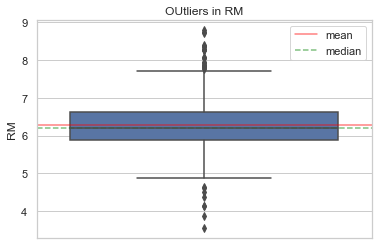

In [225]:
sns.set(style='whitegrid')
sns.boxplot(y='RM', data=housing).set(title='Outliers in RM')
plt.axhline(y=housing.RM.mean(),color='red',alpha=0.5,label='mean')
plt.axhline(y=housing.RM.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : The above graph clearly shows outliers in the box plot.

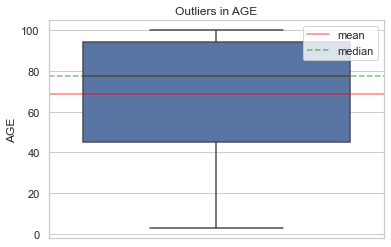

In [227]:
sns.set(style='whitegrid')
sns.boxplot(y='AGE', data=housing).set(title='Outliers in AGE')
plt.axhline(y=housing.AGE.mean(),color='red',alpha=0.5,label='mean')
plt.axhline(y=housing.AGE.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : No outliers are present in the above plot.

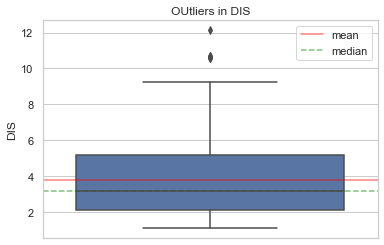

In [222]:
sns.set(style='whitegrid')
sns.boxplot(y='DIS', data=housing).set(title='OUtliers in DIS')
plt.axhline(y=housing.DIS.mean(),color='red',alpha=0.5,label='mean')
plt.axhline(y=housing.DIS.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : The above graph clearly shows few outliers in the box plot.

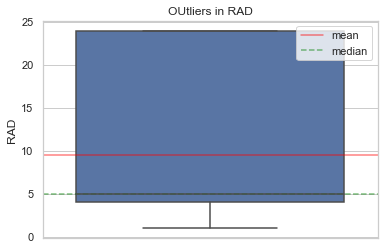

In [221]:
sns.set(style='whitegrid')
sns.boxplot(y='RAD', data=housing).set(title='OUtliers in RAD')
plt.axhline(y=housing.RAD.mean(),color='red',alpha=0.5,label='mean')
plt.axhline(y=housing.RAD.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : No outliers are present in the above plot.

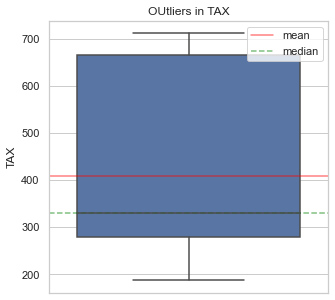

In [237]:
sns.set(style='whitegrid')
plt.figure(figsize=(5,5))
sns.boxplot(y='TAX', data=housing).set(title='OUtliers in TAX')
plt.axhline(y=housing.TAX.mean(),color='red',alpha=0.5,label='mean')
plt.axhline(y=housing.TAX.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : No outliers are present in the above plot.

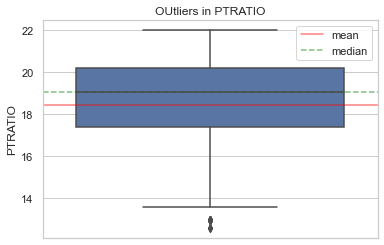

In [219]:
sns.set(style='whitegrid')
sns.boxplot(y='PTRATIO', data=housing).set(title='OUtliers in PTRATIO')
plt.axhline(y=housing.PTRATIO.mean(),color='red',alpha=0.5,label='mean')
plt.axhline(y=housing.PTRATIO.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : The above graph clearly shows outliers in the box plot.

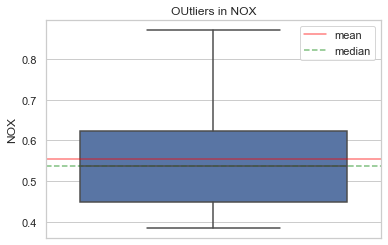

In [218]:
sns.set(style='whitegrid')
sns.boxplot(y='NOX', data=housing).set(title='OUtliers in NOX')
plt.axhline(y=housing.NOX.mean(),color='red',alpha=0.5,label='mean')
plt.axhline(y=housing.NOX.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : No outliers are present in the above plot.

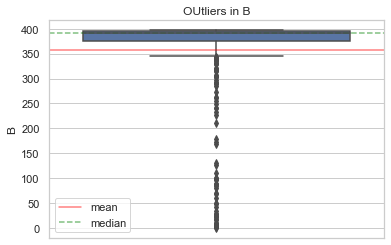

In [217]:
sns.set(style='whitegrid')
sns.boxplot(y='B', data=housing).set(title='OUtliers in B')
plt.axhline(y=housing.B.mean(),color='red',alpha=0.5,label='mean')
plt.axhline(y=housing.B.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : The above graph clearly shows outliers in the box plot.

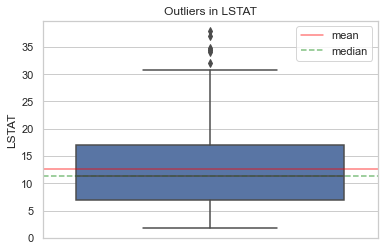

In [216]:
sns.set(style='whitegrid')
sns.boxplot(y='LSTAT', data=housing).set(title='Outliers in LSTAT')
plt.axhline(y=housing.LSTAT.mean(),color='red',alpha=0.5,label='mean')
plt.axhline(y=housing.LSTAT.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : The above graph clearly shows outliers in the box plot.

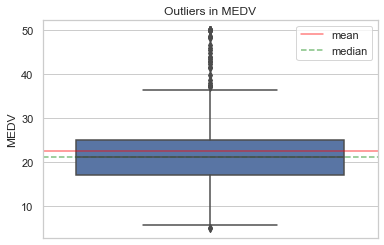

In [215]:
sns.set(style='whitegrid')
sns.boxplot(y='MEDV', data=housing).set(title='Outliers in MEDV')
plt.axhline(y=housing.MEDV.mean(),color='red',alpha=0.5,label='mean')
plt.axhline(y=housing.MEDV.median(),color='green',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : The above graph clearly shows outliers in the box plot.

|OUTLIERS Present in the columns|
|------------------|
|CRIM|
|ZN|
|AGE|
|DIS|
|PTRATIO|
|B|
|LSTAT|
|MEDV|


### LOG Transformation

#### As the data is not symmetric in few of the columns. I am applying log transformation to check my new results.

In [243]:
# log transformation 
housing['CRIM_log']=np.log(housing['CRIM'])

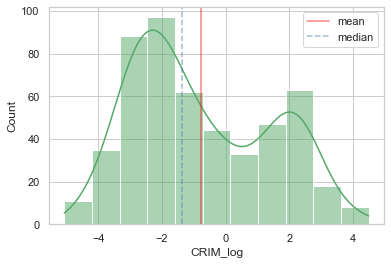

In [280]:
sns.histplot(housing['CRIM_log'],color='g',kde=True) # used histogram to see the data distribution and kde helps in showing the curve.
plt.axvline(x=housing.CRIM_log.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=housing.CRIM_log.median(),color='b',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference:From the above graph it is clear that the distribution is symmetric .Here mean is approximately equal to median.Previously the data was Right skewed.Now with help of log transformation I are able make my data normally distributed.

In [438]:
housing['CRIM_log'].skew()

0.4059344988496048

[Text(0.5, 1.0, 'Outliers in CRIM_log')]

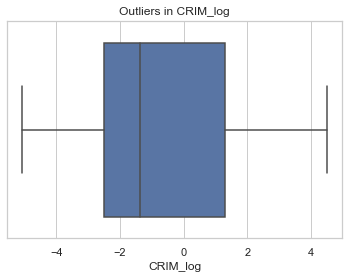

In [249]:
sns.boxplot(x='CRIM_log',data=housing).set(title='Outliers in CRIM_log')

#### Inference: We can see no outliers present in the above box plot.

In [255]:
housing['AGE_LOG']=np.log(housing['AGE'])  # applying log transformation on age column

<AxesSubplot:xlabel='AGE_LOG', ylabel='Density'>

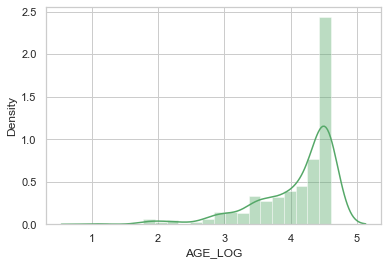

In [256]:
sns.distplot(housing['AGE_LOG'],color='g')

#### Inference: From the above we can see that the data is  left skewed . Previously also it was left skewed . But now the skewness is increased .From this we can say that log transformation  cannot deal with left skewed data. 

In [259]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'log', 'CRIM_log', 'ZN_LOG',
       'ZN_LOG10', 'AGE_LOG'],
      dtype='object')

In [260]:
housing.drop(['ZN_LOG','AGE_LOG'],axis=1,inplace=True) # droping the columns which were skewed even after transformation

In [262]:
housing.drop(['log','ZN_LOG10'],axis=1,inplace=True)

In [263]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CRIM_log'],
      dtype='object')

In [264]:
housing['DIS_LOG']=np.log(housing['DIS']) # log transformation of DIS column is created.

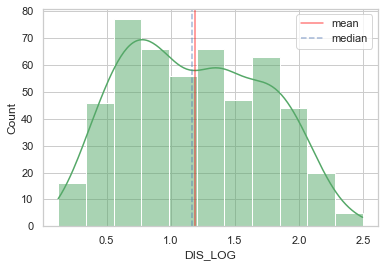

In [276]:
sns.histplot(housing['DIS_LOG'],color='g',kde=True)
plt.axvline(x=housing.DIS_LOG.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=housing.DIS_LOG.median(),color='b',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference:From the above we can see that the data is symmetric and it is normally distributed.Previously it was skewed data .

In [271]:
housing['DIS_LOG'].skew() 

0.15273013181129969

In [281]:
housing['PTRATIO_LOG']=np.log(housing['PTRATIO'])

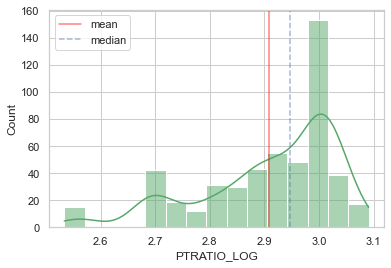

In [283]:
sns.histplot(housing['PTRATIO_LOG'],color='g',kde=True)
plt.axvline(x=housing.PTRATIO_LOG.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=housing.PTRATIO_LOG.median(),color='b',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference:From the above we can see that the data is  left skewed . Previously also it was left skewed . But now the skewness is increased .From this we can say that log transformation  cannot deal with left skewed data.

In [284]:
housing['PTRATIO_LOG'].skew()  # skewness increased  with natural log

-1.015625274497949

In [285]:
housing['B_LOG']=np.log(housing['B'])

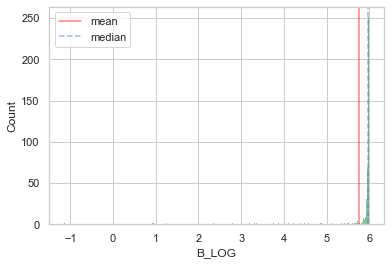

In [287]:
sns.histplot(housing['B_LOG'],color='g')
plt.axvline(x=housing.B_LOG.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=housing.B_LOG.median(),color='b',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference:From the above we can see that the data is  left skewed . Previously also it was left skewed . But now the skewness is increased .From this we can say that log transformation  cannot deal with left skewed data.

In [288]:
housing['B_LOG'].skew()    # skewness increased 

-4.826998303936602

In [289]:
housing['LSTAT_LOG']=np.log(housing['LSTAT'])

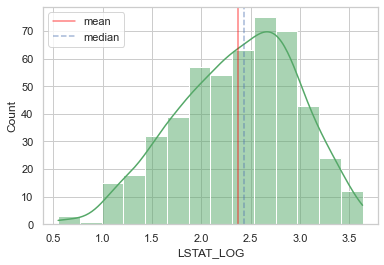

In [291]:
sns.histplot(housing['LSTAT_LOG'],color='g',kde=True)
plt.axvline(x=housing.LSTAT_LOG.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=housing.LSTAT_LOG.median(),color='b',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference: Inference:From the above we can see that the data is symmetric and it is normally distributed.Previously it was skewed data .

In [292]:
housing['LSTAT_LOG'].skew()  # symetric now

-0.3202323581479543

In [293]:
housing['MEDV_LOG']=np.log(housing['MEDV'])

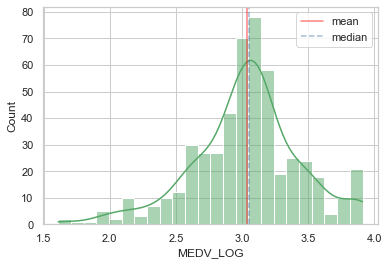

In [295]:
sns.histplot(housing['MEDV_LOG'],color='g',kde=True)
plt.axvline(x=housing.MEDV_LOG.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=housing.MEDV_LOG.median(),color='b',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference:From the above we can see that the data is symmetric and it is normally distributed.Previously it was skewed data .

In [296]:
housing['MEDV_LOG'].skew()  # symetric now

-0.33032129530987864

### Square Root Transformation

In [297]:
housing['AGE_SQRT']=np.sqrt(housing['AGE']) # applying square root transformation in Age column.

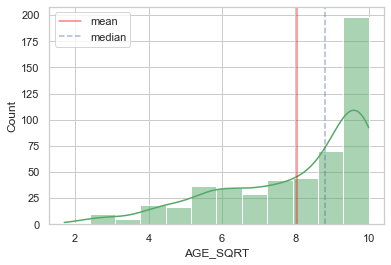

In [303]:
sns.histplot(housing['AGE_SQRT'],color='g',kde=True)
plt.axvline(x=housing.AGE_SQRT.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=housing.AGE_SQRT.median(),color='b',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference: From the above figure we can see that the data is left skewed . After applying the transformation the skewness got increased even more.From this we can come to an assumption that square root transformation is also not good at dealing left skewed data.

In [300]:
housing['AGE_SQRT'].skew()  # skew ness is getting increases with square root transformation 

-0.9774659289270576

In [302]:
from scipy.stats import boxcox

In [304]:
housing['AGE_log10']=np.log10(housing['AGE'])

<AxesSubplot:xlabel='AGE_log10', ylabel='Count'>

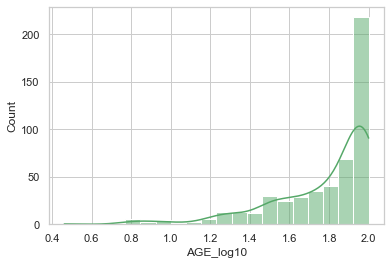

In [306]:
sns.histplot(housing['AGE_log10'],color='g',kde=True)

#### Inference: The above data is left skewed . Log10 transformation also did not work with it .

In [307]:
housing['AGE_log10'].skew()

-1.6756550438247169

### BOXCOX Transformation

In [321]:
from scipy.special import boxcox1p   # as we are having zeros in the table I am using boxcox1p 
boxcox_transformation=housing[numericals].apply(lambda x: boxcox1p(x,0.25)) # converting all the variables into boxcox transformation.

In [340]:
boxcox_transformation

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006305,4.351191,1.395317,0.454501,2.635989,7.409707,2.008132,0.756828,12.605391,4.037239,13.865019,2.255115,4.944272
1,0.027035,0.000000,2.741839,0.403677,2.602001,7.959050,2.251739,1.264296,11.792888,4.329126,13.865019,3.137884,4.721418
2,0.027015,0.000000,2.741839,0.403677,2.765730,7.228788,2.251739,1.264296,11.792888,4.329126,13.819158,1.990347,5.777482
3,0.031984,0.000000,1.341544,0.395410,2.726751,6.462162,2.520712,1.656854,11.457392,4.427069,13.839484,1.635521,5.687230
4,0.067331,0.000000,1.341544,0.395410,2.757864,6.902969,2.520712,1.656854,11.457392,4.427069,13.865019,2.344697,5.878607
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.061211,0.000000,3.585071,0.479630,2.639928,7.574160,1.462747,0.756828,12.274124,4.662947,13.809649,3.229381,4.797595
502,0.044521,0.000000,3.585071,0.479630,2.534013,7.875865,1.386125,0.756828,12.274124,4.662947,13.865019,3.127301,4.623299
503,0.059423,0.000000,3.585071,0.479630,2.722120,8.388164,1.336287,0.756828,12.274124,4.662947,13.865019,2.420990,4.935314
504,0.105354,0.000000,3.585071,0.479630,2.683441,8.330535,1.427186,0.756828,12.274124,4.662947,13.826167,2.615084,4.759755


In [365]:
boxcox_transformation.skew()

CRIM       1.716618
ZN         1.344887
INDUS     -0.204876
NOX        0.619619
RM        -0.026980
AGE       -1.231096
DIS        0.487802
RAD        0.732900
TAX        0.432655
PTRATIO   -0.950898
B         -3.751265
LSTAT      0.087371
MEDV       0.126219
dtype: float64

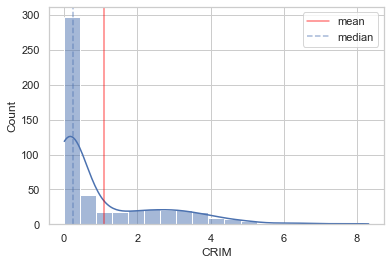

In [385]:
sns.histplot(x='CRIM',data=boxcox_transformation,kde=True) # using histogram to see data distribution
plt.axvline(x=boxcox_transformation.CRIM.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=boxcox_transformation.CRIM.median(),color='b',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference: By applying box cox transformation to the CRIM I have noticed the data is still Right skewed but the Skewness got reduceed as compared to the untransformed one. I have noticed that log transfomation converted it into symmetric but box cox failed. 

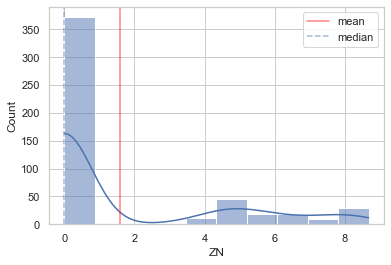

In [386]:
sns.histplot(x='ZN',data=boxcox_transformation,kde=True)
plt.axvline(x=boxcox_transformation.ZN.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=boxcox_transformation.ZN.median(),color='b',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference: By applying box cox transformation to the ZN. I have noticed the data is still Right skewed but the Skewness got reduceed as compared to the untransformed one. In this case box cox perfomed better than log transformation..

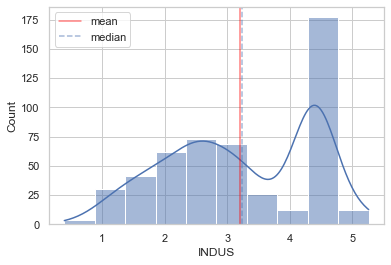

In [389]:
sns.histplot(x='INDUS',data=boxcox_transformation,kde=True)
plt.axvline(x=boxcox_transformation.INDUS.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=boxcox_transformation.INDUS.median(),color='b',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference: From the above figure we can see that the data is symmetric with mean and median almost equal.

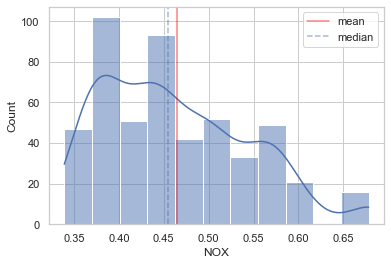

In [388]:
sns.histplot(x='NOX',data=boxcox_transformation,kde=True)
plt.axvline(x=boxcox_transformation.NOX.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=boxcox_transformation.NOX.median(),color='b',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference: From the above figure we can see that the data is slightly right skewed. Mean is greater than median.

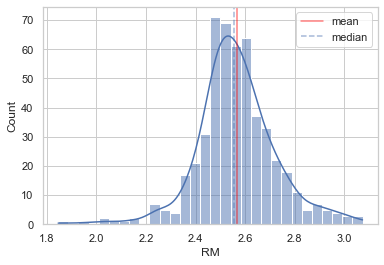

In [390]:
sns.histplot(x='RM',data=boxcox_transformation,kde=True)
plt.axvline(x=boxcox_transformation.RM.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=boxcox_transformation.RM.median(),color='b',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference: From the above we can see that data is distributed normally  and symmetric .

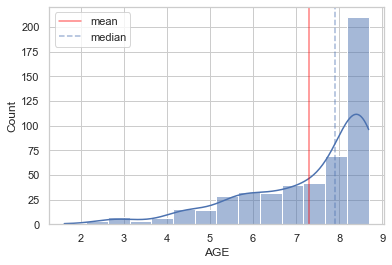

In [391]:
sns.histplot(x='AGE',data=boxcox_transformation,kde=True)
plt.axvline(x=boxcox_transformation.AGE.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=boxcox_transformation.AGE.median(),color='b',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference: From the above figure we can see that the data is left skewed . Even box cox failed to deal with this variable.

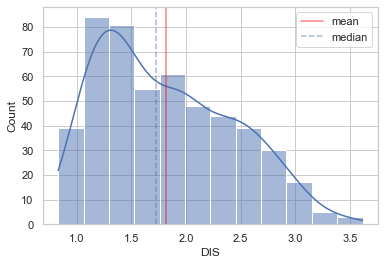

In [392]:
sns.histplot(x='DIS',data=boxcox_transformation,kde=True)
plt.axvline(x=boxcox_transformation.DIS.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=boxcox_transformation.DIS.median(),color='b',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference : From the above we can say that the data is symmetric . Here mean and median are almost equal.

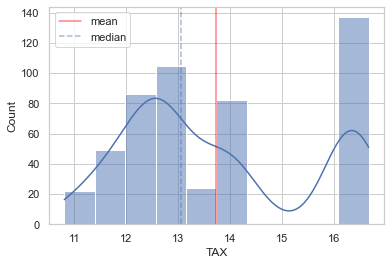

In [393]:
sns.histplot(x='TAX',data=boxcox_transformation,kde=True)
plt.axvline(x=boxcox_transformation.TAX.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=boxcox_transformation.TAX.median(),color='b',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference: From the above we can see the data is distributed symmetrically. Here are mean and median are approximately equal.

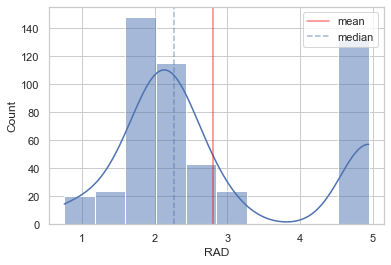

In [395]:
sns.histplot(x='RAD',data=boxcox_transformation,kde=True)
plt.axvline(x=boxcox_transformation.RAD.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=boxcox_transformation.RAD.median(),color='b',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference: From the above figure we can see that the data is slightly right skewed. Here mean is greater than median.

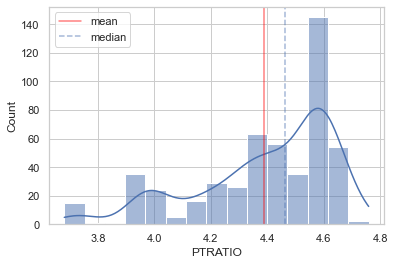

In [396]:
sns.histplot(x='PTRATIO',data=boxcox_transformation,kde=True)
plt.axvline(x=boxcox_transformation.PTRATIO.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=boxcox_transformation.PTRATIO.median(),color='b',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference: From the above figure we can see that the data is left skewed . Even box cox failed to deal with this variable.

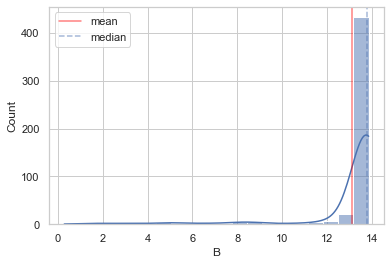

In [401]:
sns.histplot(x='B',data=boxcox_transformation,kde=True,bins=20)
plt.axvline(x=boxcox_transformation.B.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=boxcox_transformation.B.median(),color='b',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference: From the above figure we can see that the data is left skewed . Even box cox failed to deal with this variable.

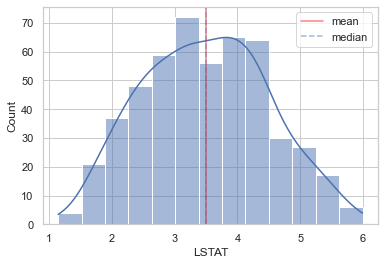

In [400]:
sns.histplot(x='LSTAT',data=boxcox_transformation,kde=True)
plt.axvline(x=boxcox_transformation.LSTAT.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=boxcox_transformation.LSTAT.median(),color='b',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference: From the above figure we can see that the data is distributed symmetrically .

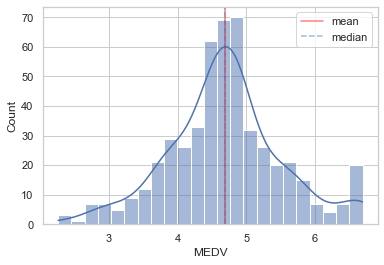

In [398]:
sns.histplot(x='MEDV',data=boxcox_transformation,kde=True)
plt.axvline(x=boxcox_transformation.MEDV.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=boxcox_transformation.MEDV.median(),color='b',ls='--',alpha=0.5,label='median')
plt.legend()

#### Inference: From the above figure we can see that data is distributed symmetrically.

#### Conclusion: From the above transformation techniques i observed that left skewed date was not able to convert into symmetric.All the variables are not good with one  transformation technique, few performed good with  log and few other with boxcox.

### Distribution of categorical variables

<AxesSubplot:xlabel='CHAS', ylabel='count'>

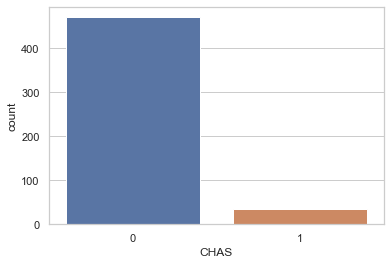

In [403]:
sns.countplot(x='CHAS',data=housing)

#### Inference: From the above plot we can see that they are more no of zeros  which means very few buildings are bound near river.

[Text(0.5, 1.0, 'Categorical Vs Numerical')]

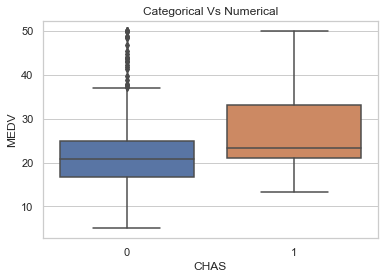

In [486]:
sns.boxplot(x='CHAS',y='MEDV',data=housing).set(title='Categorical Vs Numerical')

#### Inference: The median value of 1 is higher than zero.

In [412]:
housing.corr(method='spearman')

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,...,LSTAT,MEDV,CRIM_log,DIS_LOG,PTRATIO_LOG,B_LOG,LSTAT_LOG,MEDV_LOG,AGE_SQRT,AGE_log10
CRIM,1.000000,-0.571660,0.735524,0.821465,-0.309116,0.704140,-0.744986,0.727807,0.729045,0.465283,...,0.634760,-0.558891,1.000000,-0.744986,0.465283,-0.360555,0.634760,-0.558891,0.704140,0.704140
ZN,-0.571660,1.000000,-0.642811,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,...,-0.490074,0.438179,-0.571660,0.614627,-0.448475,0.163135,-0.490074,0.438179,-0.544423,-0.544423
INDUS,0.735524,-0.642811,1.000000,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,...,0.638747,-0.578255,0.735524,-0.757080,0.433710,-0.285840,0.638747,-0.578255,0.679487,0.679487
NOX,0.821465,-0.634828,0.791189,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,...,0.636828,-0.562609,0.821465,-0.880015,0.391309,-0.296662,0.636828,-0.562609,0.795153,0.795153
RM,-0.309116,0.361074,-0.415301,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,...,-0.640832,0.633576,-0.309116,0.263168,-0.312923,0.053660,-0.640832,0.633576,-0.278082,-0.278082
AGE,0.704140,-0.544423,0.679487,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,...,0.657071,-0.547562,0.704140,-0.801610,0.355384,-0.228022,0.657071,-0.547562,1.000000,1.000000
DIS,-0.744986,0.614627,-0.757080,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,...,-0.564262,0.445857,-0.744986,1.000000,-0.322041,0.249595,-0.564262,0.445857,-0.801610,-0.801610
RAD,0.727807,-0.278767,0.455507,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,...,0.394322,-0.346776,0.727807,-0.495806,0.318330,-0.282533,0.394322,-0.346776,0.417983,0.417983
TAX,0.729045,-0.371394,0.664361,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,...,0.534423,-0.562411,0.729045,-0.574336,0.453345,-0.329843,0.534423,-0.562411,0.526366,0.526366
PTRATIO,0.465283,-0.448475,0.433710,0.391309,-0.312923,0.355384,-0.322041,0.318330,0.453345,1.000000,...,0.467259,-0.555905,0.465283,-0.322041,1.000000,-0.072027,0.467259,-0.555905,0.355384,0.355384


<AxesSubplot:>

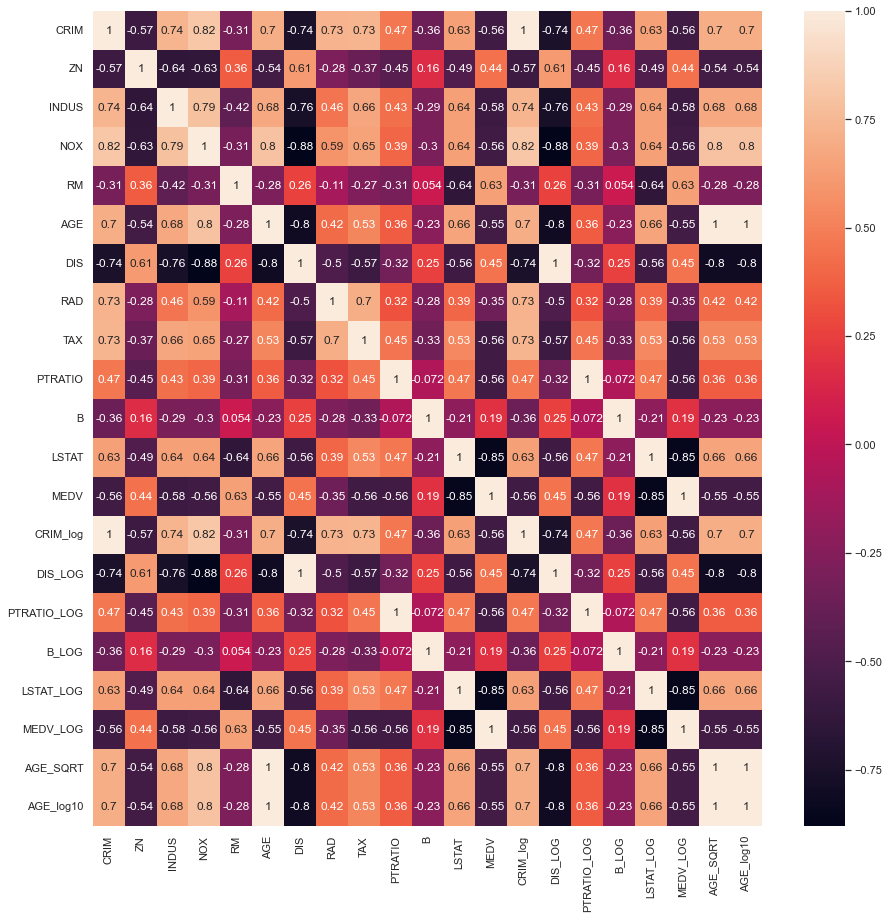

In [418]:
plt.figure(figsize=(15,15)) # used heat map to see corelation between the variables.
sns.heatmap(housing.corr(method='spearman'),annot=True) 

#### As There are outliers even after transformation , I am going with non parametric approach 'Spearman rank correlation'

#### Numerical Vs Numerical relationship

[Text(0.5, 1.0, 'Relationship between CRIM and MEDV')]

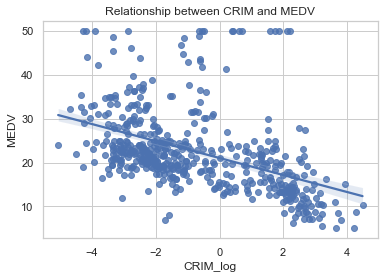

In [469]:
sns.regplot(x='CRIM_log',y='MEDV',data=housing).set(title='Relationship between CRIM and MEDV')

#### Inference: Negitive corelation is observed between the variables .

[Text(0.5, 1.0, 'Relationship between ZN and MEDV')]

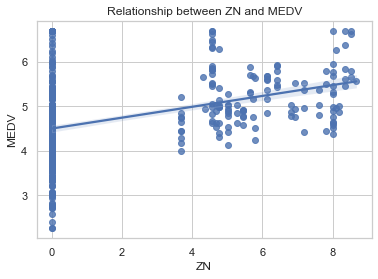

In [471]:
sns.regplot(x='ZN',y='MEDV',data=boxcox_transformation).set(title='Relationship between ZN and MEDV')

#### Inference: Even after using the transformed data there is no relationship between these two variables.Hence this variable is not improtant to us.

[Text(0.5, 1.0, 'Relationship between INDUS and MEDV')]

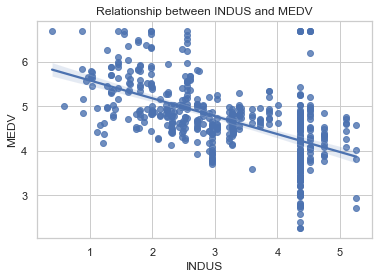

In [472]:
sns.regplot(x='INDUS',y='MEDV',data=boxcox_transformation).set(title='Relationship between INDUS and MEDV')

#### Inference : Negitive linear corelation between the variables .Here i used the transformed variables.

[Text(0.5, 1.0, 'Relationship between NOX and MEDV')]

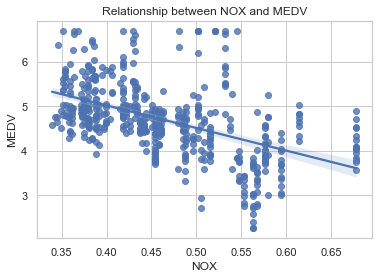

In [473]:
sns.regplot(x='NOX',y='MEDV',data=boxcox_transformation).set(title='Relationship between NOX and MEDV')

#### Inference: Negitive corelation is observed between them.

[Text(0.5, 1.0, 'Relationship between RM and MEDV')]

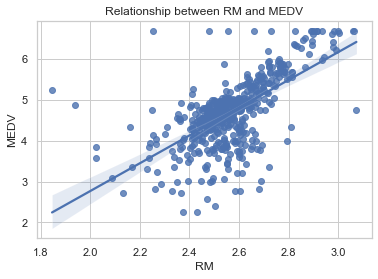

In [474]:
sns.regplot(x='RM',y='MEDV',data=boxcox_transformation).set(title='Relationship between RM and MEDV')

#### Inference: A strong linear correlation is observed between Independent variable RM and dependent variable MEDV.

[Text(0.5, 1.0, 'Relationship between AGE and MEDV')]

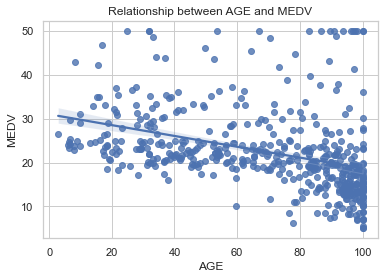

In [459]:
sns.regplot(x='AGE',y='MEDV',data=housing).set(title='Relationship between AGE and MEDV')

#### Inference: Negitive corelation is observed between these two variables.

[Text(0.5, 1.0, 'Relationship between DIS and MEDV')]

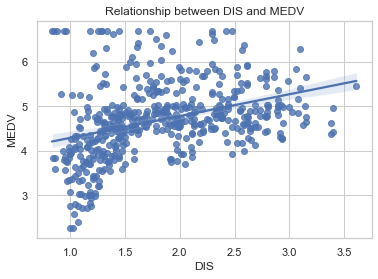

In [476]:
sns.regplot(x='DIS',y='MEDV',data=boxcox_transformation).set(title='Relationship between DIS and MEDV')

#### Inference: A strong linear corelation is observed between the variables.

[Text(0.5, 1.0, 'Relationship between RAD and MEDV')]

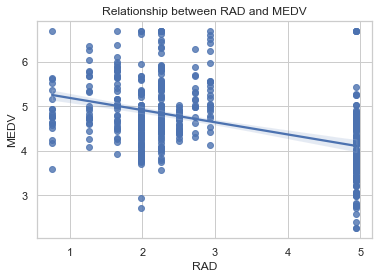

In [479]:
sns.regplot(x='RAD',y='MEDV',data=boxcox_transformation).set(title='Relationship between RAD and MEDV') # RAD IS  A  DISCREATE DATA

#### Inference: No linear corelation is present between these two variables.

[Text(0.5, 1.0, 'Relationship between TAX and MEDV')]

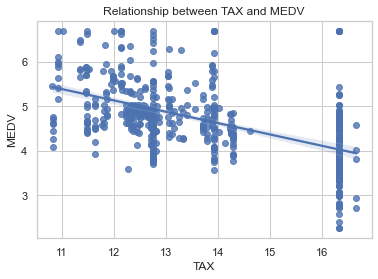

In [480]:
sns.regplot(x='TAX',y='MEDV',data=boxcox_transformation).set(title='Relationship between TAX and MEDV')

#### Inference : Negivtive  linear corelation is observed between the variables.

[Text(0.5, 1.0, 'Relationship between PTRATIO and MEDV')]

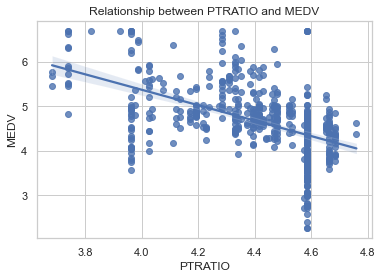

In [483]:
sns.regplot(x='PTRATIO',y='MEDV',data=boxcox_transformation).set(title='Relationship between PTRATIO and MEDV')

#### Inference : Negivtive  linear corelation is observed between the variables.

[Text(0.5, 1.0, 'Relationship between  B and MEDV')]

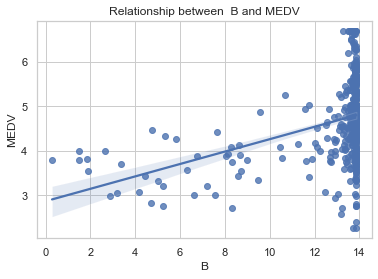

In [481]:
sns.regplot(x='B',y='MEDV',data=boxcox_transformation).set(title='Relationship between  B and MEDV')

#### Inference : Although the line looks linear majority of the data scattered at the end . This variable needs treated well.Only if there is proper corelation this variable met be useful.

[Text(0.5, 1.0, 'Relationship between LSTAT and MEDV')]

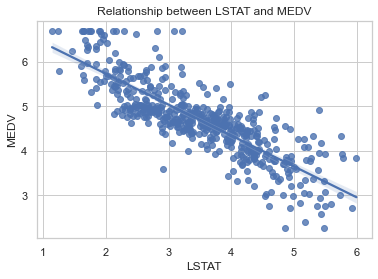

In [482]:
sns.regplot(x='LSTAT',y='MEDV',data=boxcox_transformation).set(title='Relationship between LSTAT and MEDV')

#### Inference: From the above figure we can see a negitive linear correlation between the variables.

#### Conclusion: DIS and RM  are the two variables that would be helpful in predicting the house price as the variables are strongly corelated with the output or dependent  variable MEDV .